In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Projet_SY32_2/YOLOv5

/content/drive/MyDrive/Projet_SY32_2/YOLOv5


# **Import libraries**

In [ ]:
import os 
import pandas as pd 
import numpy as np
from sklearn import model_selection
import ast
import shutil, sys  
import os 
import pandas as pd 
import numpy as np
from sklearn import model_selection
import cv2

# **Define useful functions**

In [50]:


def append_new_line(file_name, text_to_append):
    """Append given text as a new line at the end of file"""
    # Open the file in append & read mode ('a+')
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)



def process_data(data, data_type="train"):

    IMAGE_PATH = os.path.join(YOLO_DATA_PATH, f"images/{data_type}" )
    LABEL_PATH = os.path.join(YOLO_DATA_PATH, f"labels/{data_type}" )
    
    
    for id in range(data.shape[0]):
        yolo_data = []
        row = data.iloc[id]
        x = row['x']
        y = row['y']
        w = row['w']
        h = row['h']

        img_name = row['name_image'][:-4]

        x_center = x + h/2
        y_center = y + w/2
        
        im = cv2.imread(os.path.join(DATA_PATH, f"images/pos/{img_name}.jpg"))
        (H,W) = im.shape[0], im.shape[1]
        x_center /= H
        y_center /= W
        w /= W
        h /= H

        yolo_data.append([0,y_center, x_center, w, h])
        
        yolo_data_convert_str = [str(x) for x in yolo_data] 

        file_txt_path = os.path.join(LABEL_PATH, f"{img_name}.txt")
        np.savetxt(
                file_txt_path,
                yolo_data,
                fmt = ["%d", "%f", "%f", "%f", "%f"]
            )
            
        shutil.copyfile(
            os.path.join(DATA_PATH, f"images/pos/{img_name}.jpg"),
            os.path.join(YOLO_DATA_PATH, f"images/{data_type}/{img_name}.jpg")
        )

# **Initialize structure of customed data format for yolo pretrained model**

In [ ]:
# Define specified  path to images

DATA_PATH      = r"../dataset-main/train"
YOLO_DATA_PATH = r"yolo_data"
LABEL_CSV_PATH = r"../dataset-main/train/labels_csv"

os.makedirs(os.path.join(YOLO_DATA_PATH, "images/train"))
os.makedirs(os.path.join(YOLO_DATA_PATH, "images/validation"))

os.makedirs(os.path.join(YOLO_DATA_PATH, "labels/train"))
os.makedirs(os.path.join(YOLO_DATA_PATH, "labels/validation"))


# **Create train and validation set**


In [ ]:
labels = pd.DataFrame()
for dir1 in os.listdir(LABEL_CSV_PATH):
    csv_file_target = os.path.join(LABEL_CSV_PATH, dir1)
    df = pd.read_csv(csv_file_target, header= None)
    df.insert(0, "name_image", dir1[:-4] + '.jpg') 
    labels = labels.append(df, ignore_index=True)


columns_names = ["name_image", "x", "y", "h", "w", "diff"]
labels.columns = columns_names

imgs_train, img_valid = model_selection.train_test_split(
    np.unique(labels['name_image']),
    test_size = 0.1,
    random_state = 42,
    shuffle=True
)

df_train = labels[labels['name_image'].isin(imgs_train)].reset_index(drop=True)
df_valid = labels[labels['name_image'].isin(img_valid)].reset_index(drop=True)


process_data(df_train, data_type="train")
process_data(df_valid, data_type="validation")


In [52]:
labels

,name_image,x,y,h,w,diff
0,hoxuanvi_pos_008.jpg,741,177,2387,1492,0
1,grallthi_pos_010.jpg,211,173,440,252,0
2,grallthi_pos_012.jpg,122,136,554,336,0
3,ljeannea_pos_001.jpg,517,709,207,114,0
4,ljeannea_pos_001.jpg,496,817,204,122,1
...,...,...,...,...,...,...
735,lelongph_pos_009.jpg,587,498,113,58,0
736,lelongph_pos_009.jpg,538,398,96,58,0
737,lelongph_pos_009.jpg,645,405,124,71,0
738,lelongph_pos_009.jpg,507,367,82,51,1


Clone repo and install requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7. Models and datasets download automatically from the latest YOLOv5 release.



In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12228, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 12228 (delta 15), reused 20 (delta 8), pack-reused 12195
Receiving objects: 100% (12228/12228), 11.96 MiB | 3.53 MiB/s, done.
Resolving deltas: 100% (8459/8459), done.
/home/tranquochung/Desktop/repositories/Projet_SY32_2/Yolov5/yolov5


In [ ]:
!python3 ./yolov5/detect.py --weights  yolov5s.pt yolov5l.pt  yolov5m.pt yolov5x.pt 

# **TRAIN**

Train a YOLOv5s model on ecoucup dataset, batch-size, image size and either pretrained --weights yolov5s.pt  

In [12]:
!python3 yolov5/train.py --img 1024 --batch 8 --epochs 100 --data ecocup.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=ecocup.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-250-g6adc53b Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

All training results are saved to runs/train/ with incrementing run directories

# **Export results**

In [75]:
!python3 ./yolov5/detect.py --source ../dataset-main/test/ --weights best.pt

detect: weights=['best.pt'], source=../dataset-main/test/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-250-g6adc53b Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/151 /content/drive/MyDrive/Projet_SY32_2/dataset-main/test/atordjma_001.jpg: 384x640 1 ecocup, Done. (0.232s)
image 2/151 /content/drive/MyDrive/Projet_SY32_2/dataset-main/test/atordjma_002.jpg: 384x640 1 ecocup, Done. (0.220s)
image 3/151 /content/drive/MyDrive/Projet_SY32_2/dataset-main/test/atordjma_003.jpg: 384x640 1 ecocup, Done. (0.223s)
image 4/151 /content/drive/MyDrive/Projet_SY32_2

In [4]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')  # default


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-6-11 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [77]:
DATA_PATH = "../dataset-main/test/"

imgs      = []
img_files = []
data_res  = []

for file in os.listdir(DATA_PATH):
  img = cv2.imread(os.path.join(DATA_PATH, file))
  results = model(img)
  preds = results.pandas().xyxy

  for id in range(len(preds[0].index.values)):
    x_min = int(preds[0]['xmin'].values[id])
    y_min = int(preds[0]['ymin'].values[id])
    x_max = int(preds[0]['xmax'].values[id]) 
    y_max = int(preds[0]['ymax'].values[id])

    w = x_max - x_min
    h = y_max - y_min

    s = preds[0]['confidence'].values[id]

    d = [file, y_min, x_min, h, w, s]
    data_res.append(d)




columns_names = ["name_image", "x", "y", "h", "w", "s"]
results_yolov5 = pd.DataFrame(columns=columns_names,
                        data=data_res)
results_yolov5.to_csv('results_yolov5.csv', index=False, header=False)


In [78]:
results_yolov5

,name_image,x,y,h,w,s
0,maresfra_004.jpg,455,1,293,244,0.462741
1,jbarthel_002.jpg,209,531,290,186,0.594569
2,moreajul_003.jpg,187,474,157,99,0.619300
3,thlauren_004.jpg,865,977,2160,1411,0.764900
4,quachpas_005.jpg,70,245,733,394,0.627932
...,...,...,...,...,...,...
90,atordjma_008.jpg,484,482,400,244,0.664772
91,atordjma_008.jpg,501,762,535,318,0.276888
92,mejiadie_010.jpg,355,331,376,212,0.894548
93,thlauren_008.jpg,378,1133,391,507,0.911176


# **Evaluate results csv file**

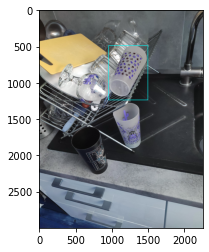

<Figure size 600x800 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt


def trace_boite(data, id_img):
  d = data.iloc[id_img]

  name_img = d['name_image']
  image_test = os.path.sep.join([DATA_PATH,name_img])

  img = cv2.imread(image_test)
  x, y, w, h = d['x'], d['y'], d['w'], d['h']
  cv2.rectangle(img, (y, x), (y + w, x + h), (0,255,254), 6)


  fig, ax = plt.subplots()
  fig = plt.figure(figsize=(6,8), dpi=100)
    

  ax.imshow(img)

trace_boite(results_yolov5, 6)